\Lab 8: Define and Solve an ML Problem of Your Choosing

In [49]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [50]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename, header=0)


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I've chosen the airbnb data set. I will be predicting whether a listing will have a high rating or not (4.5 stars and above). This is an example of supervised learning and is a binary classification problem. In the dataset, the label is high_rating  and it will contain the value True or False. My features are:'host_response_rate',
       'host_is_superhost', 
       , 'bathrooms', 'bedrooms', 'beds', 'price’,
       'number_of_reviews', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 
      'reviews_per_month'. And I created a new column, ‘high_rating’, which will be our label.

It's an important problem because it helps hosts know whether their airbnb is successful or not, whether they're acting as a good host and can figure what factors make their listing successful and have a good rating. It will also be helpful for Airbnb, since the more satisfied their customers are, the more revenue they make. They can use this model to have tips and tricks for their host users. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

First, we must further inspect the data.

In [51]:
print(df.head(20))
print(df['review_scores_rating'])
print(df.columns)
print(df.shape)

                                                 name  \
0                               Skylit Midtown Castle   
1   Whole flr w/private bdrm, bath & kitchen(pls r...   
2            Spacious Brooklyn Duplex, Patio + Garden   
3                    Large Furnished Room Near B'way　   
4                  Cozy Clean Guest Room - Family Apt   
5      Lovely Room 1, Garden, Best Area, Legal rental   
6                    Only 2 stops to Manhattan studio   
7                             UES Beautiful Blue Room   
8   Amazing location! Wburg. Large, bright & tranquil   
9         Perfect for Your Parents:  Privacy + Garden   
10                   Sweet and Spacious Brooklyn Loft   
11   Maison des Sirenes1,bohemian, luminous apartment   
12                               Midtown Pied-a-terre   
13                   Modern 1 BR / NYC / East Village   
14                Spacious 1 bedroom in luxe building   
15                              Large B&B Style rooms   
16            Lovely Room 2; Ga

Then, we must create and define the label from the Data Set.

In [28]:
df['high_rating'] = np.where(df['review_scores_rating'] >= 4.00, True, False)
df['high_rating']

0         True
1         True
2         True
3         True
4         True
         ...  
28017     True
28018     True
28019    False
28020     True
28021     True
Name: high_rating, Length: 28022, dtype: bool

Identify features.

In [29]:
df.drop(columns = {'name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about','host_listings_count','neighbourhood_group_cleansed', 'room_type',
       'host_total_listings_count', 'host_has_profile_pic','review_scores_rating',
       'calculated_host_listings_count','amenities','minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'calculated_host_listings_count_entire_homes','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'calculated_host_listings_count_private_rooms','review_scores_value',
       'calculated_host_listings_count_shared_rooms', 
       'n_host_verifications'}, axis=1, inplace=True)

In [30]:
#verify it was done correctly
X = df.drop(columns = 'high_rating', axis=1)
df.shape
#df.head()
print(X.columns)


Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'instant_bookable', 'reviews_per_month'],
      dtype='object')


In [31]:
#clean the data by handling missing data.
nan_count = np.sum(df.isnull(), axis = 0)
nan_detected = nan_count!=0
nan_detected
is_int_or_float = (df.dtypes == 'int64') | (df.dtypes == 'float64')
is_int_or_float #True if int or float
to_impute = nan_detected & is_int_or_float
to_impute
df.columns[to_impute]

Index(['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds'], dtype='object')

In [32]:
#clean the data by handling missing data, continued.
df['host_acceptance_rate_na'] = df['host_acceptance_rate'].isnull()
df['host_response_rate_na'] = df['host_response_rate'].isnull()
df['bedrooms_na'] = df['bedrooms'].isnull()
df['beds_na'] = df['beds'].isnull()
df.head()

df['host_acceptance_rate'].fillna(np.mean(df['host_acceptance_rate_na']), inplace=True)
df['host_response_rate'].fillna(np.mean(df['host_response_rate_na']), inplace=True)
df['bedrooms'].fillna(np.mean(df['bedrooms_na']), inplace=True)
df['beds'].fillna(np.mean(df['beds_na']), inplace=True)

#make sure it worked:
print("{} missing values count :{}".format('host_acceptance_rate_na', np.sum(df['host_acceptance_rate_na'].isnull(), axis = 0)))
print("{} missing values count :{}".format('host_response_rate_na', np.sum(df['host_response_rate_na'].isnull(), axis = 0)))
print("{} missing values count :{}".format('bedrooms_na', np.sum(df['bedrooms_na'].isnull(), axis = 0)))
print("{} missing values count :{}".format('beds_na', np.sum(df['beds_na'].isnull(), axis = 0)))

df['bedrooms']
df.drop(columns = {'host_response_rate_na','host_acceptance_rate_na','bedrooms_na','beds_na'}, axis=1, inplace=True)




host_acceptance_rate_na missing values count :0
host_response_rate_na missing values count :0
bedrooms_na missing values count :0
beds_na missing values count :0


In [33]:
#Scale the data
from sklearn.preprocessing import StandardScaler

#Create a scaler object.
scaler = StandardScaler()
df_to_scale = df.select_dtypes(float)

#Scale the data and transform it.
transformed_data = scaler.fit_transform(df_to_scale)

#create a new df. 
df_scaled = pd.DataFrame(transformed_data, columns = df_to_scale.columns, index= df_to_scale.index)
#make sure it worked.
print(df_to_scale.columns)
#Combine the dataframes
df.update(df_scaled)


Index(['host_response_rate', 'host_acceptance_rate', 'bathrooms', 'bedrooms',
       'beds', 'price', 'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'reviews_per_month'],
      dtype='object')


In [34]:


#Perform one-hot encoding to switch categorical values to numerical

to_encode = df.select_dtypes(include=['object']).columns
to_encode


#There are no features needed to be one-hot encoded. Therefore the data is now prepared.

Index([], dtype='object')



I would like to use logistic regression, I feel like its a good model for binary classification, and namely my ML problem.
I cleaned and prepared my data by removing features I did not deem necessary, and I filled in any missing values to the features that did stay. I didn't have to hot-one encode any of my features, and I did scale the data.
I will evaluate my model by testing it's accuracy, precision, and recall. I will use grid search to fine-tune my model.


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

I do have a new feature list, I chose to keep 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'instant_bookable', 'reviews_per_month'. And I'm doing label creation by creating a new label, ‘high_rating’, which will be the label. I also am doing feature engineering by removing non-pertinent  features. I cleaned up the data by figuring which ones had missing data and filling it in. And I scaled the data. I built the model, spliting the data with 66% training and 33% testing. Trained the logistic regression model and used cross validation. I plan to implement a logistic regression using the scikit-learn implementation. I'll also do a grid search to figure the best hyperparameter C, and fine tune the model. Then I'll plot a precision-recall curve and plot the ROC and figure the AUC. I'm doing a decision tree for good measure as well, to make sure everything is working correctly. 
Then I'll play with the hyperparameters until I can figure the optimal parameters for my model.


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_recall_curve

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [36]:
#I already prepared the data, so we will create and fit the model to the
#training data.
y = df['high_rating']

X = df.drop(columns = 'high_rating', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=123)


In [37]:


model_default = LogisticRegression(max_iter=10000)
model_default.fit(X_train, y_train)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18774, 25)
(9248, 25)
(18774,)
(9248,)


In [38]:
# Make predictions using predict_proba
proba_predictions = model_default.predict_proba(X_test)
proba_predictions_default = []
for i in proba_predictions:
    proba_predictions_default.append(i[1])

class_label_predictions_default = model_default.predict(X_test)

#Using a confusion matrix, we will figure how accurate the model is.
c_m = confusion_matrix(y_test, class_label_predictions_default, labels=[True,False])
pd.DataFrame(c_m, columns=['Predicted: Bad review', 'Predicted: Good review'],
index=['Actual: Bad review', 'Actual: Good review'])

,Predicted: Bad review,Predicted: Good review
Actual: Bad review,8813,44
Actual: Good review,179,212


In [39]:
#Another logistic regression model using GridSearchSV

cs=[10**i for i in range(-7,7)]
param_grid = dict(C = list(cs))
param_grid

print('Running Grid Search...')

#Creating a model
model = LogisticRegression(max_iter=10000)

#Then will run a grid search with 5 cross validation.
grid = GridSearchCV(model, param_grid, cv=5)

#And will fit the model for the training data.
grid_search = grid.fit(X_train, y_train)
print('Done')

Running Grid Search...


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Done


In [40]:
#Figure which is the best C

best_C = grid_search.best_params_['C']
best_C

0.1

In [41]:
#Now we train and test with the best hyperparameter

model_best = LogisticRegression(C = best_C, max_iter=10000)
model_best.fit(X_train, y_train)

proba_predictions = model_best.predict_proba(X_test)
proba_predictions_best = []
for i in proba_predictions:
    proba_predictions_best.append(i[1])

#predict.
class_label_predictions_best = model_best.predict(X_test)

#Figure the accuracy
c_m = confusion_matrix(y_test, class_label_predictions_best, labels=[True,False])
pd.DataFrame(c_m,columns=['Predicted: bad review', 'Predicted: good review'],
             index=['Actual: bad review', 'Actual: good review'])

,Predicted: bad review,Predicted: good review
Actual: bad review,8813,44
Actual: good review,182,209


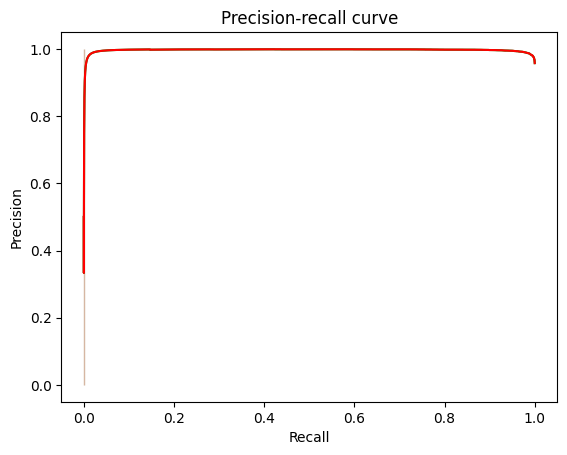

In [42]:
#plot precision curves
precision_default, recall_default, thresholds_default=precision_recall_curve(y_test, proba_predictions_default)
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test,proba_predictions_best)

fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=recall_default, y=precision_default, color='g')
sns.lineplot(x=recall_best, y=precision_best, color='r')

plt.title("Precision-recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

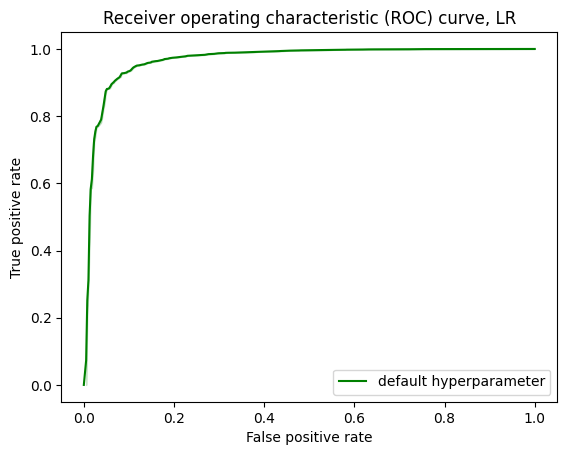

In [43]:
#import necessary functions

from sklearn.metrics import roc_curve 
from sklearn.metrics import auc

fpr_default, tpr_default, thresholds_default = roc_curve(y_test,proba_predictions_default)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_best)


fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=fpr_default, y=tpr_default, color='g')
plt.title("Receiver operating characteristic (ROC) curve, LR")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['default hyperparameter'])
plt.show()

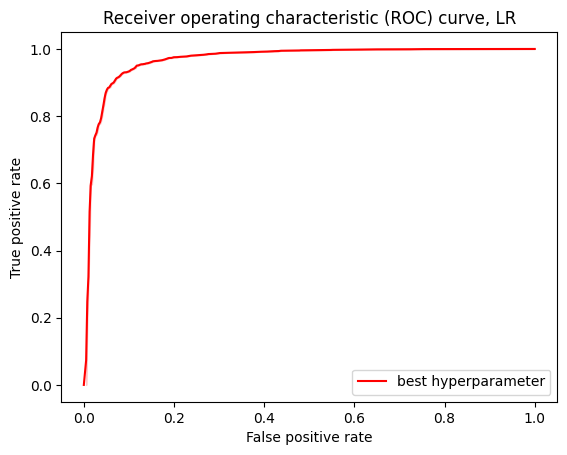

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=fpr_best, y=tpr_best, color='r')
plt.title("Receiver operating characteristic (ROC) curve, LR")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['best hyperparameter'])
plt.show()

In [45]:
auc_default = auc(fpr_default, tpr_default) 
auc_best = auc(fpr_best, tpr_best)
print(auc_default)
print(auc_best)

0.9675309918578424
0.9676693077592333


In [46]:
#Figuring which is the best features.
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif


selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)

filter = selector.get_support()
top_features = X.columns[filter]

print("Best features:")
print(top_features)

#have to create new train and test for the features
new_X_train = X_train[top_features]
new_X_test = X_test[top_features]

model = LogisticRegression(C = best_C, max_iter=10000) 

model.fit(new_X_train, y_train)

pp = model.predict_proba(new_X_test) 
proba_predictions = []
for i in pp:
    proba_predictions.append(i[1])

fpr, tpr, thresholds = roc_curve(y_test, proba_predictions)
auc_result = auc(fpr, tpr)
print(auc_result)

Best features:
Index(['number_of_reviews', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location'],
      dtype='object')
0.975649037982586


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [2 3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [47]:
#will also train with a decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 


def train_test_DT(X_train, X_test, y_train, y_test, depth, leaf=1,crit='entropy'):
    model = DecisionTreeClassifier(criterion = crit, max_depth = depth,min_samples_leaf = leaf)

    model.fit(X_train, y_train)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    return acc_score


accuracy_list = [] 
max_depth_range = [25,40] 
for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    accuracy_list.append(float(score))

Max Depth=25, accuracy score: 0.9659385813148789
Max Depth=40, accuracy score: 0.9653979238754326


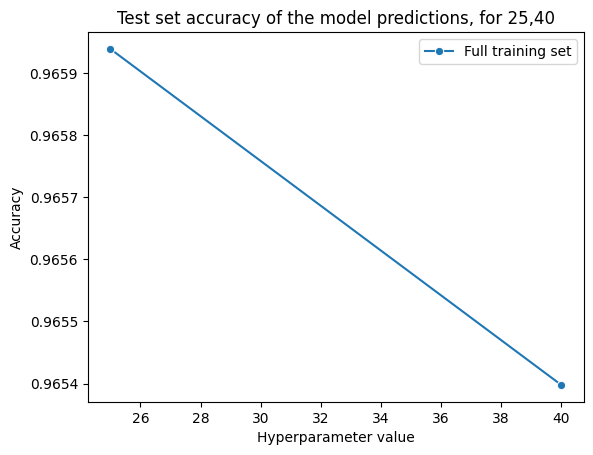

In [48]:
def visualize_accuracy(hyperparam_range, acc):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    p = sns.lineplot(x=hyperparam_range, y=acc, marker='o', label = 'Full training set')
    plt.title('Test set accuracy of the model predictions, for ' + ','.join([str(h) for h in hyperparam_range]))
    ax.set_xlabel('Hyperparameter value')
    ax.set_ylabel('Accuracy')
    plt.show()

visualize_accuracy(max_depth_range, accuracy_list)

Analysis: The model is very accurate, with the decision tree both are incredibly accurate but the max depth of 40 performs better. 
I'm not sure why the PRC graph is mirrored to what a normal PRC graph looks like. My PRC graph states my logistic regression model is predicting inaccurately, but the other graphs and my decision tree model say that otherwise. Recall is how well the model is getting true positives and precision is how well the model is not getting false positives.
The model is also doing well for AUC, will correctly predict a random listing. The AUC is 0.9754980166539275, which is really good.
My ROC was able to accurately distinguish the positive and negative classes across different decision thresholds.
